In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt 
import cartopy
import cartopy.crs as ccrs
import pandas as pd
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta

In [6]:
case = "fanv3_2th"
path = "/glade/scratch/jinmuluo/archive/" + case + "/lnd/hist/" 
h = 'h4'
start_date = date(2000, 1, 1)
end_date = date(2000, 6, 1)
delta = end_date - start_date
fanCLM = []
for i in range(delta.days//30 + 1):
    month = start_date + relativedelta(months=i)
    month = month.strftime('%Y-%m')
    fanCLM.append(path + case + ".clm2." + h + "." + month +".nc")
print(len(fanCLM), fanCLM[-1])

6 /glade/scratch/jinmuluo/archive/fanv3_2th/lnd/hist/fanv3_2th.clm2.h4.2000-06.nc


In [9]:
dsCLM = xr.open_mfdataset(fanCLM, decode_times=True)
dsCLM

<xarray.Dataset>
Dimensions:       (hist_interval: 2, lat: 96, levdcmp: 25, levgrnd: 25, levlak: 10, levsoi: 20, lon: 144, time: 6)
Coordinates:
  * levgrnd       (levgrnd) float32 0.01 0.04 0.09 0.16 ... 19.48 28.87 42.0
  * levsoi        (levsoi) float32 0.01 0.04 0.09 0.16 ... 5.06 5.95 6.94 8.03
  * levlak        (levlak) float32 0.05 0.6 2.1 4.6 ... 18.6 25.6 34.33 44.78
  * levdcmp       (levdcmp) float32 0.01 0.04 0.09 0.16 ... 19.48 28.87 42.0
  * time          (time) datetime64[ns] 2000-02-01 2000-03-01 ... 2000-07-01
  * lon           (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat           (lat) float32 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
Dimensions without coordinates: hist_interval
Data variables:
    mcdate        (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mcsec         (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mdcur         (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    mscur         (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    nstep         (time) int32 dask.array<chunksize=(1,), meta=np.ndarray>
    time_bounds   (time, hist_interval) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
    date_written  (time) |S16 dask.array<chunksize=(1,), meta=np.ndarray>
    time_written  (time) |S16 dask.array<chunksize=(1,), meta=np.ndarray>
    area          (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    landfrac      (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    landmask      (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    pftmask       (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    nbedrock      (time, lat, lon) float64 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
    SMIN_NO3      (time, lat, lon) float32 dask.array<chunksize=(1, 96, 144), meta=np.ndarray>
Attributes:
    title:                                CLM History file information
    comment:                              NOTE: None of the variables are wei...
    Conventions:                          CF-1.0
    history:                              created on 01/25/23 09:43:59
    source:                               Community Terrestrial Systems Model
    hostname:                             cheyenne
    username:                             jinmuluo
    version:                              unknown
    revision_id:                          $Id: histFileMod.F90 42903 2012-12-...
    case_title:                           fanv3_2th
    case_id:                              fanv3_2th
    Surface_dataset:                      surfdata_1.9x2.5_hist_78pfts_CMIP6_...
    Initial_conditions_dataset:           finidat_interp_dest.nc
    PFT_physiological_constants_dataset:  clm50_params.c211112.nc
    ltype_vegetated_or_bare_soil:         1
    ltype_crop:                           2
    ltype_UNUSED:                         3
    ltype_landice:                        4
    ltype_deep_lake:                      5
    ltype_wetland:                        6
    ltype_urban_tbd:                      7
    ltype_urban_hd:                       8
    ltype_urban_md:                       9
    ctype_vegetated_or_bare_soil:         1
    ctype_crop:                           2
    ctype_crop_noncompete:                2*100+m, m=cft_lb,cft_ub
    ctype_landice:                        4*100+m, m=1,glcnec
    ctype_deep_lake:                      5
    ctype_wetland:                        6
    ctype_urban_roof:                     71
    ctype_urban_sunwall:                  72
    ctype_urban_shadewall:                73
    ctype_urban_impervious_road:          74
    ctype_urban_pervious_road:            75
    cft_c3_crop:                          1
    cft_c3_irrigated:                     2
    cft_temperate_corn:                   3
    cft_irrigated_temperate_corn:         4
    cft_spring_wheat:                

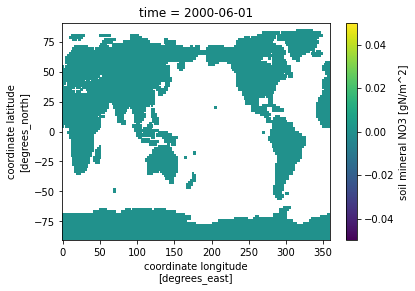

In [15]:
dsCLM['SMIN_NO3'].sel(time='2000-06-01').plot()